# Comparing CHIRPS and ARC2 Precipitation Data in Kenya

In this demo we are comparing two historical precipitation datasets - __[CHIRPS](http://data.planetos.com/datasets/chg_chirps_global_05)__ and __[ARC2](http://data.planetos.com/datasets/noaa_arc2_africa_01)__.
Climate Hazards Group InfraRed Precipitation with Station data (CHIRPS) is a global 30+ year gridded rainfall dataset using satellite and in situ data with a resolution 0.05 degrees, while the Africa Rainfall Climatology version 2 (ARC2) is also a 30+ year gridded analyzis of precipitation using satellite and in situ data with resolution of 0.1 degrees. 

Using these datasets you can analyze extreme events that occured in the past or identify long time precipitation trends. Even though CHIRPS and ARC2 have some differences, the trends remain similar.


In this demo we will:

1) demonstrate the use of package API to fetch data;

2) show time-series of averaged data over the area of Kenya;

3) investigate data to:

    a. find the maximum precipitation over the entire period

    b. get average yearly values and compare them with time-series plot

    c. find out average number of dry days in both of the datasets

    d. compare average monthly values using violin plot and bar plot
    
    e. find out 2016 monthly anomalies


In [1]:
%matplotlib notebook
import numpy as np
from dh_py_access import package_api
import dh_py_access.lib.datahub as datahub
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from po_data_process import get_data_in_pandas_dataframe, make_plot,get_comparison_graph
import dh_py_access.package_api as package_api
import matplotlib.gridspec as gridspec
import calendar
#import warnings
import datetime
#warnings.filterwarnings("ignore")
import matplotlib
print (matplotlib.__version__)

3.0.3


<font color='red'>Please put your datahub API key into a file called APIKEY and place it to the notebook folder or assign your API key directly to the variable API_key!</font>

In [2]:
server = 'api.planetos.com'
API_key = open('APIKEY').readlines()[0].strip() #'<YOUR API KEY HERE>'
version = 'v1'

At first, we need to define the dataset names and temporal ranges. Please note that the datasets have different time ranges. So we will download the data from 1981, when CHRIPS starts (ARC2 is from 1983).

In [3]:
dh=datahub.datahub(server,version,API_key)
dataset1='noaa_arc2_africa_01'
variable_name1 = 'pr'
dataset2='chg_chirps_global_05'
variable_name2 = 'precip'
time_start = '1981-01-01T00:00:00'
time_end = '2017-11-01T00:00:00'

Then we define spatial range. We decided to analyze Kenya, where agriculture is the second largest contributor to the GDP, after the service sector. Most of its agricultural production comes from the fertile highlands of Kenya in South-Western part of the country, where they grow tea, coffee, sisal, pyrethrum, corn, and wheat. However, feel free to change the area according to your interest. 

In [4]:
area_name = 'Kenya'
latitude_north = 1.6; longitude_west = 34.2
latitude_south = -2.5; longitude_east = 38.4

### Download the data with package API

1. Create package objects
2. Send commands for the package creation
3. Download the package files

In [5]:
package_arc2_africa_01 = package_api.package_api(dh,dataset1,variable_name1,longitude_west,longitude_east,latitude_south,latitude_north,time_start,time_end,area_name=area_name)
package_chg_chirps_global_05 = package_api.package_api(dh,dataset2,variable_name2,longitude_west,longitude_east,latitude_south,latitude_north,time_start,time_end,area_name=area_name)

In [6]:
package_arc2_africa_01.make_package()

Package exists


In [7]:
package_chg_chirps_global_05.make_package()

Package exists


In [8]:
package_arc2_africa_01.download_package()
package_chg_chirps_global_05.download_package()

File already downloaded
File already downloaded


### Work with downloaded files

We start with opening the files with xarray and then it will compute some basic statistics for the dataset comparison:

1. Average yearly values
2. Number of dry days
3. Number of days with precipitation over 10 mm
4. Average monthly values
5. 2016 monthly anomalies

In [9]:
dd1 = xr.open_dataset(package_arc2_africa_01.local_file_name)
dd2 = xr.open_dataset(package_chg_chirps_global_05.local_file_name)

/Users/etoodu/anaconda/envs/py36/lib/python3.6/site-packages/xarray/conventions.py:362: SerializationWarning: variable 'precip' has multiple fill values {-9999.0, 9.96921e+36}, decoding all values to NaN.
  stack_char_dim=stack_char_dim)


In the plot below we see the __[ARC2](http://data.planetos.com/datasets/noaa_arc2_africa_01)__ and __[CHIRPS](http://data.planetos.com/datasets/chg_chirps_global_05)__ time-series, where the annual precipitation is averaged over the area. We can see that one or the other dataset over/under estimates the values, however the trend remains the same. We can also see that 1996 and 2005 have been quite wet years for South-West Kenya. 

In [10]:
yearly_sum1 = dd1.pr.resample(time="1AS").sum('time')
yearly_mean_sum1 = yearly_sum1.mean(axis=(1,2))

yearly_sum2 = dd2.precip.resample(time="1AS").sum('time') 
yearly_mean_sum2 = yearly_sum2.mean(axis=(1,2))

fig = plt.figure(figsize=(10,5))
plt.plot(yearly_mean_sum1.time,yearly_mean_sum1, '*-',linewidth = 1,label = dataset1)  
plt.plot(yearly_mean_sum2.time,yearly_mean_sum2, '*-',linewidth = 1,c='red',label = dataset2)
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

In the plot above, we used data from 1982 to show all the data from CHIRPS. We now want to limit the data to have the same time range for both of the datasets, so that we can compare them.

In [11]:
time_start = '1983-01-01T00:00:00'

dd2 = dd2.sel(time = slice(time_start,time_end))
dd2_dat = np.ma.masked_where(np.isnan(dd2.precip.data),dd2.precip.data)
dd2_dat = dd2.precip.data
dd1_dat = dd1.pr.data

Then we will find out the maximum precipitation over the whole period, and we will see that CHIRPS shows much higher values than ARC2. The differences between ARC2 and CHIRPS are brought out in __[CHIRPS Reality Checks document](http://wiki.chg.ucsb.edu/wiki/CHIRPS_Reality_Checks)__ as well. 

In [12]:
# maximum precipitation over the whole period
print ('\033[1mMaximum precipitation over the whole period \033[0m')
print(dataset1 + '\t' + str(np.nanmax(dd1_dat)))
print(dataset2 + '\t' + str(np.nanmax(dd2_dat)))

Maximum precipitation over the whole period 
noaa_arc2_africa_01	299.93958
chg_chirps_global_05	573.56384


In this section, we will find minimum, maximum and average number of dry days. Interestingly, CHIRPS and ARC2 datasets have very similar values for dry days. We can see that there is 9,912 - 10,406 dry days in 34 years on average. Which is not that much, only about 27 days per year.  

In [13]:
dd1_dry_days = np.sum(np.where(dd1_dat>0.1,0,1),axis=0)
dd2_dry_days = np.sum(np.where(dd2_dat>0.1,0,1),axis=0)

# minimum, maximum and average nr of dry days
print ('\033[1mNumber of dry days:\tMinimum\t Maximum Average\033[0m')
print(dataset1 + '\t' + str(np.amin(dd1_dry_days)), '\t',str(np.amax(dd1_dry_days)),'\t',str(np.mean(dd1_dry_days)))
print(dataset2 + '\t' + str(np.amin(dd2_dry_days)),'\t',str(np.amax(dd2_dry_days)),'\t',str(np.mean(dd2_dry_days)))

/Users/etoodu/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


Number of dry days:	Minimum	 Maximum Average
noaa_arc2_africa_01	5340 	 12276 	 9912.652729384437
chg_chirps_global_05	6022 	 12140 	 10407.918408826945


### Monthly averages over the period

Here we will be comparing the monthly averages first using the violin plot and then the bar plot for an easier overview.

In [14]:
##help(dd1.precip.resample)
dd1_monthly_avg = dd1.pr.resample(time="1MS").sum('time') 
dd2_monthly_avg = dd2.precip.resample(time="1MS").sum('time') 


In [18]:
mm_data1 = [];mm_data2 = []
for i in range(12):
    mmm1 = np.mean(dd1_monthly_avg[i::12,:,:],axis=0).values
    mm_data1.append(mmm1.mean(axis=1))
    
    mmm2 = np.mean(dd2_monthly_avg[i::12,:,:],axis=0).values
    mm_data2.append(mmm2.mean(axis=1))


In the violin plot below we can see that CHRIPS has significantly bigger maximum values during April, May and November. However, during most of the months the mean values of ARC2 and CHIRPS are quite similar.

<IPython.core.display.Javascript object>


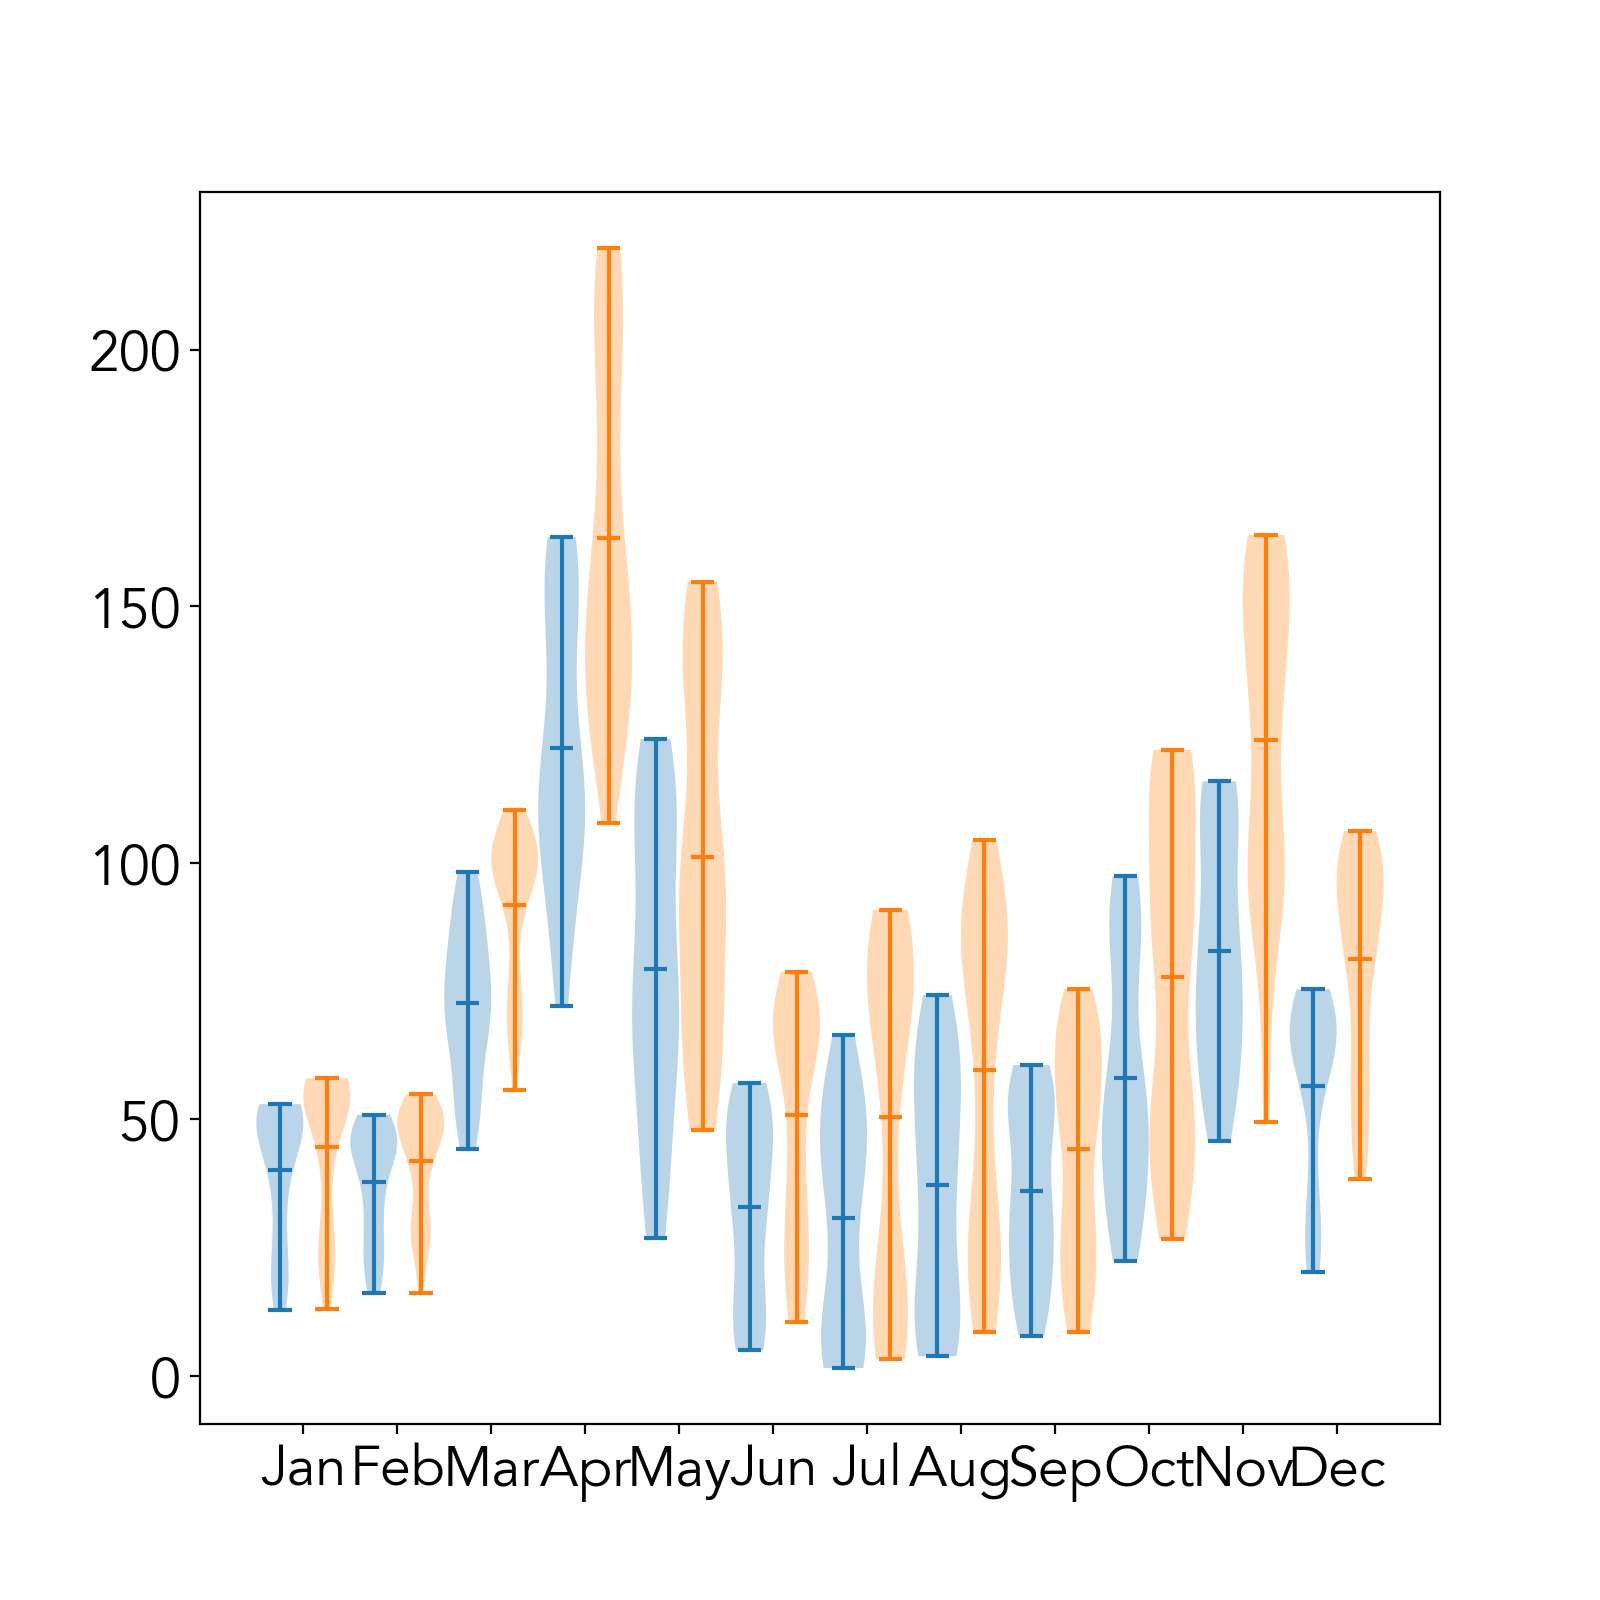

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.violinplot(mm_data1,np.arange(0.75,12.75,1),
                   showmeans=True,
                   showmedians=False)
ax.violinplot(mm_data2,np.arange(1.25,13.25,1),
                   showmeans=True,
                   showmedians=False)
plt.setp(ax, xticks = np.arange(1,13,1),
         xticklabels=[calendar.month_abbr[m] for m in np.arange(1,13,1)])

plt.show()

We will now demonstrate the mean monthly values on the bar plot as well so that it would be easier to follow the monthly averages. They are similar for both of the datasets. The biggest differences are in April and November — we saw the same thing in the previous plot. In addition, we can also see that the wettest month of the year is April and the summer months are the driest.

<IPython.core.display.Javascript object>


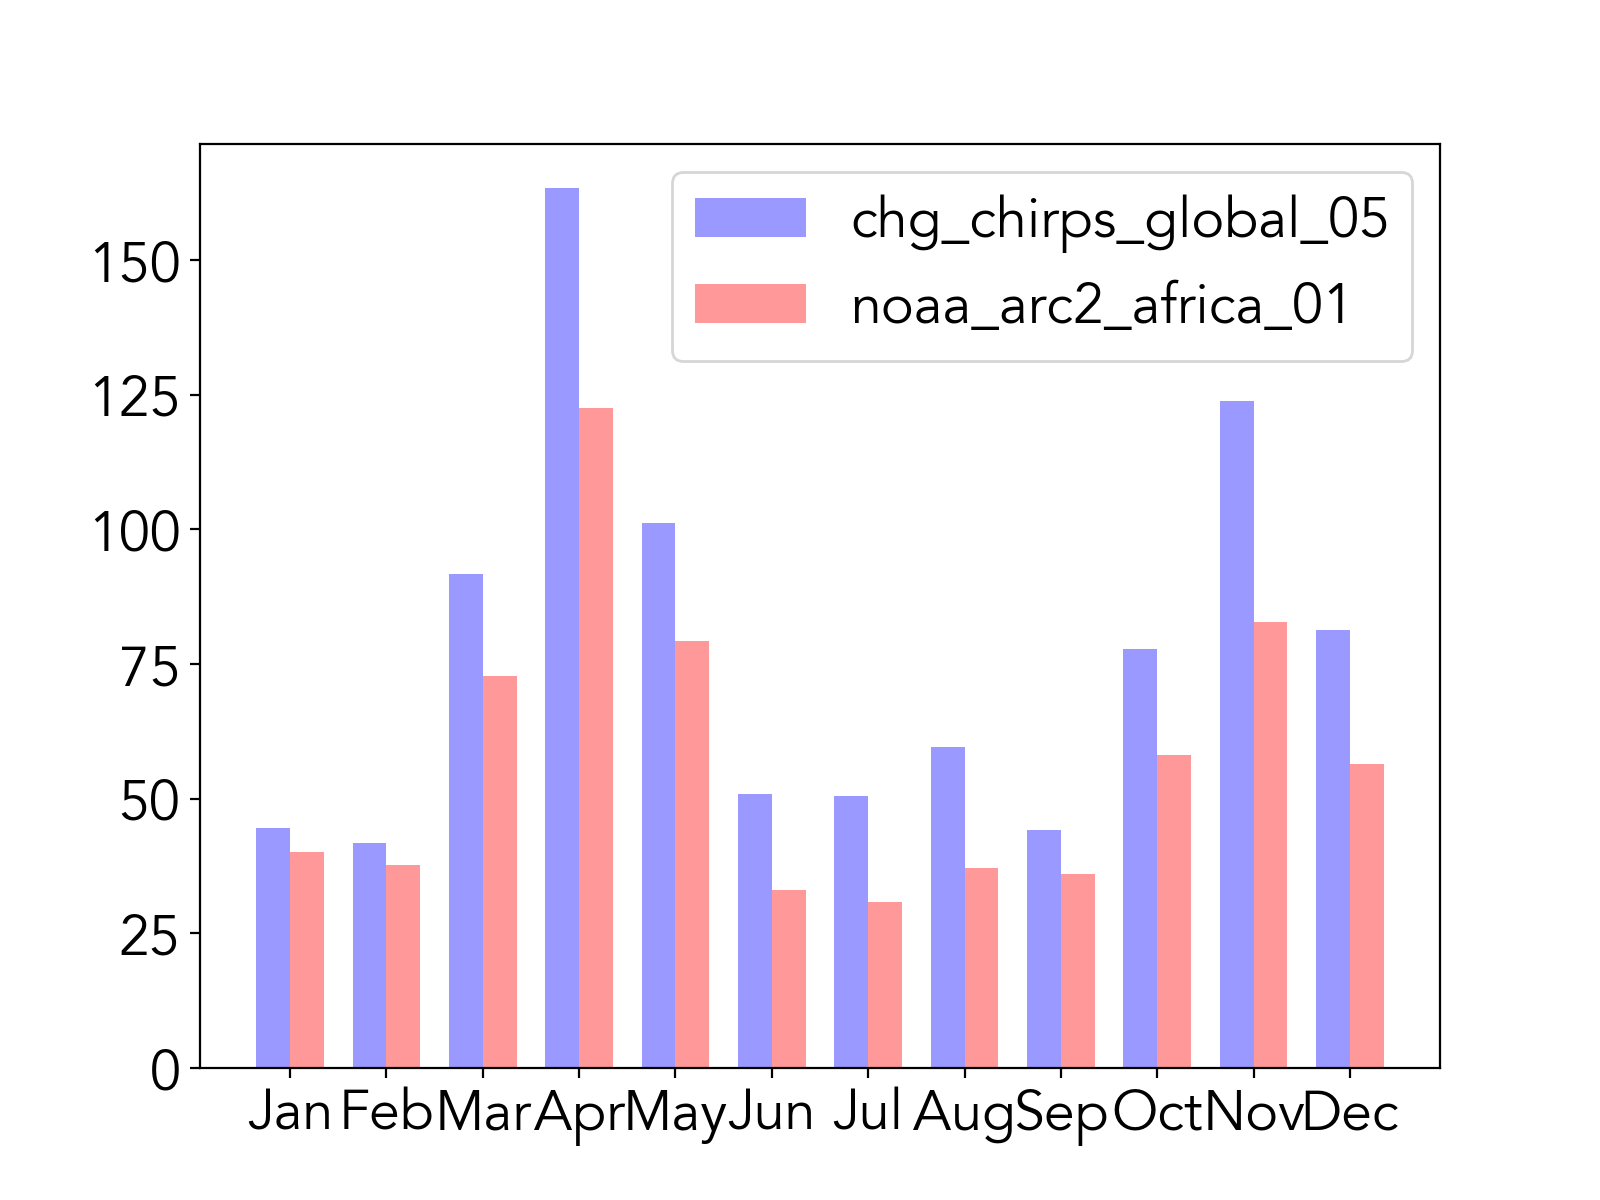

In [20]:
averaged_monthly_mean2 = np.mean(mm_data2,axis = (1))
averaged_monthly_mean1 = np.mean(mm_data1,axis = (1))


fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

bar_width = 0.35
opacity = 0.4

ax.bar(np.arange(0,12,1)-bar_width/2,averaged_monthly_mean2,
    bar_width,
    alpha=opacity,
    color='b',
    label = dataset2)
       
ax.bar(np.arange(0,12,1) + bar_width/2,averaged_monthly_mean1,
       bar_width,
       alpha=opacity,
       color='r',
       label = dataset1)

plt.legend()
plt.setp(ax, xticks = np.arange(0,12,1),
         xticklabels=[calendar.month_abbr[m+1] for m in np.arange(0,12,1)])

plt.show()

Finally, let’s see the monthly anomalies for 2016. The period used for computing the climatology is 1983-2017. Positive values in the plot means that 2016 precipitation was above long term normal. It seems that April in 2016 had significant precipitation in South-West Kenya. At the same time, October and December, which are short rain periods, had less precipitation than normal.

There were serious droughts in Kenya during 2016 but the mostly covered Northern and South-East Kenya. World Weather Attribution has made a __[2016 Kenya drought analyzis](https://wwa.climatecentral.org/analyses/kenya-drought-2016/)__ from where you can also see the South-West area had more precipitation than normal, but a little less between June and December, except for November.

In [21]:
time_start = '2016-01-01T00:00:00'
time_end = '2016-12-31T23:00:00'

dd2_2016 = dd2.sel(time = slice(time_start,time_end))
dd1_2016 = dd1.sel(time = slice(time_start,time_end))

In [24]:
dd1_monthly2016_avg = dd1_2016.pr.resample(time="1MS").sum('time') 
dd2_monthly2016_avg = dd2_2016.precip.resample(time="1MS").sum('time') 

<IPython.core.display.Javascript object>


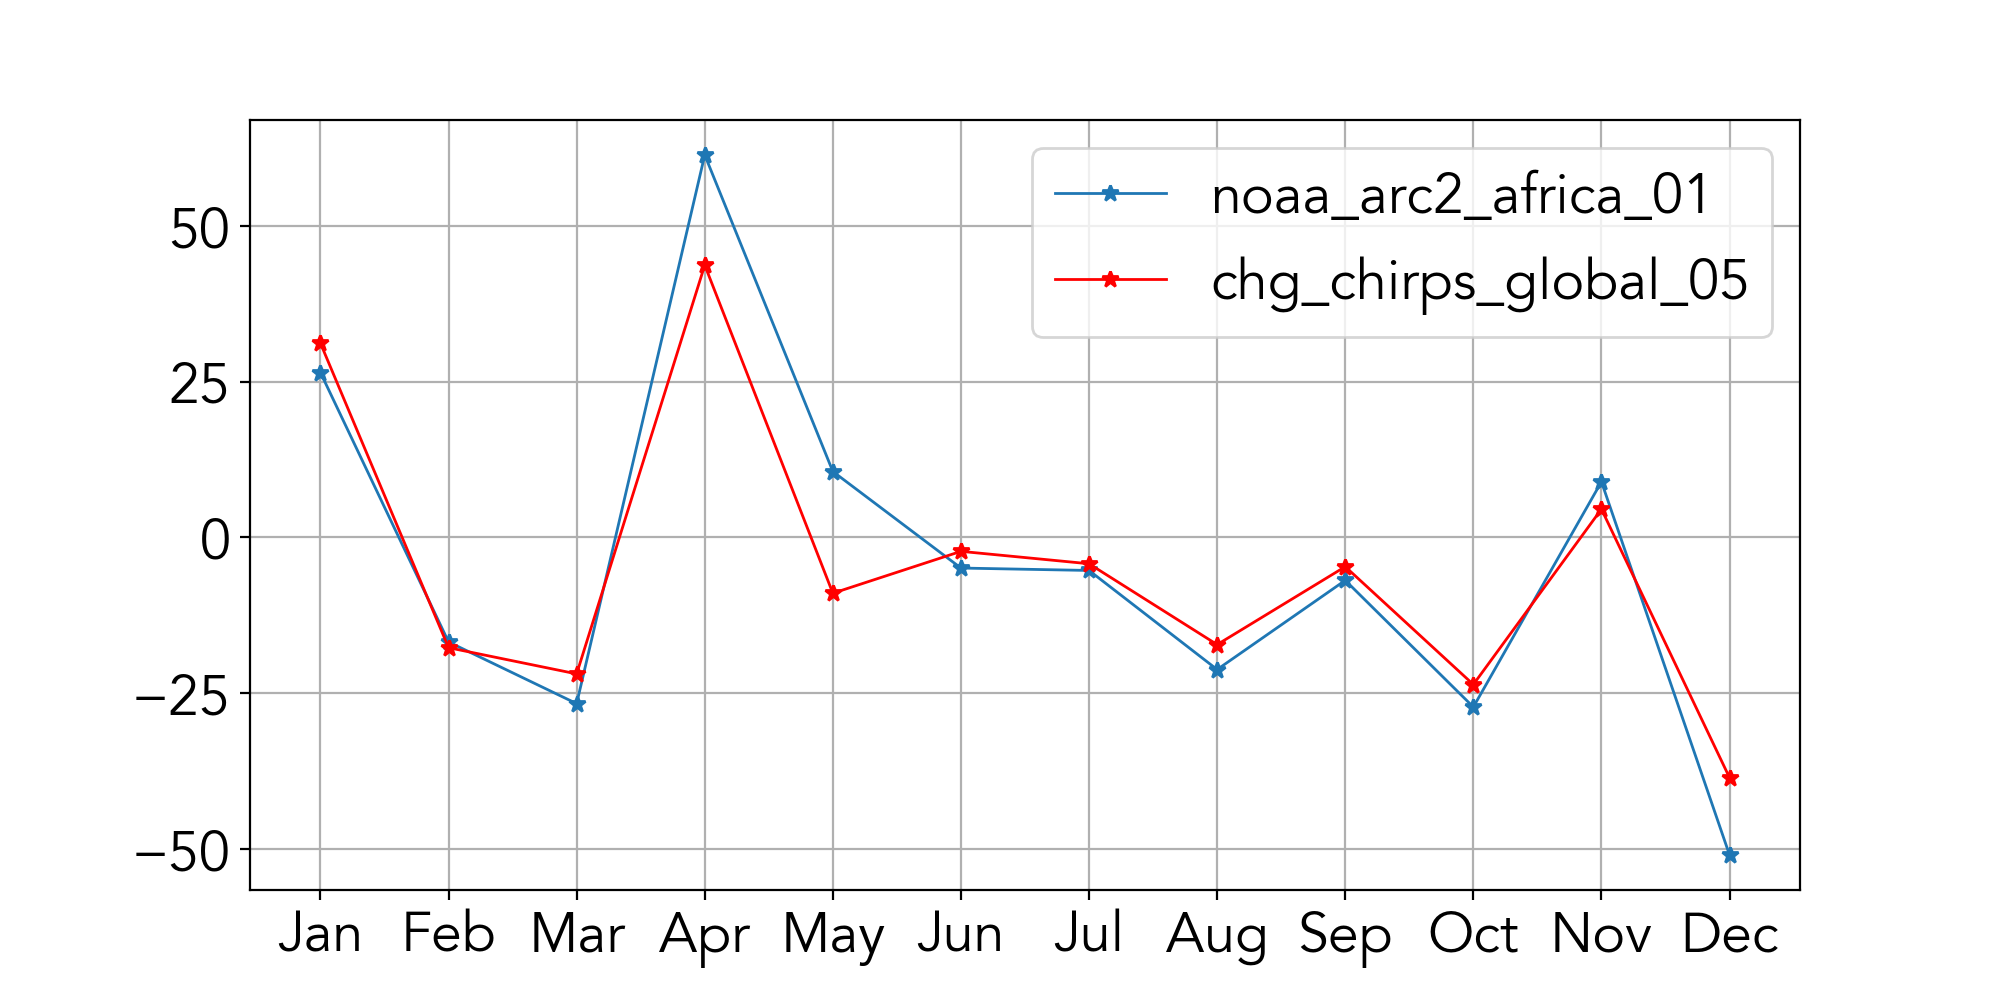

In [23]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.plot(np.arange(1,13,1),np.mean(dd2_monthly2016_avg,axis = (1,2))-averaged_monthly_mean2, '*-',linewidth = 1,label = dataset1)  
plt.plot(np.arange(1,13,1),np.mean(dd1_monthly2016_avg,axis = (1,2))-averaged_monthly_mean1, '*-',linewidth = 1,c='red',label = dataset2)

plt.setp(ax, xticks = np.arange(1,13,1),
         xticklabels=[calendar.month_abbr[m] for m in np.arange(1,13,1)])
plt.legend()
plt.grid()
plt.show()